In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Path of the file to read.
games_path = 'E:/Desktop/JypiterLite/Streamchik/games.csv'
games_data = pd.read_csv(games_path)
gdc = games_data.copy()
gdc.head()
gdc.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Looking into list of platforms

platform_list = gdc['Platform'].unique()
platform_list

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
# Removing legacy platforms (released before 2010)

legacy_list = gdc[gdc['Platform'].isin(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
               'N64', 'PS', 'XB', '2600', 'PSP', 'GC', 'GEN', 'DC',
               'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'])].index
gdc.drop(legacy_list, inplace = True)
gdc.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,2684.000000,2710.000000,2710.000000,2710.000000,2710.000000,1514.000000
mean,2012.277571,0.158878,0.160461,0.056111,0.040875,73.303831
std,3.936327,0.458354,0.461113,0.248033,0.122958,12.290713
min,1985.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,66.000000
50%,2013.000000,0.010000,0.030000,0.000000,0.010000,75.000000
75%,2015.000000,0.100000,0.110000,0.030000,0.030000,82.000000
max,2016.000000,6.030000,6.420000,4.390000,2.380000,97.000000


In [8]:
# Filling out the year of release for entries with no value (info found online)

gdc[gdc['Year_of_Release'].isnull()]
gdc.at[1131, 'Year_of_Release'] = 2010
gdc.at[4648, 'Year_of_Release'] = 2012
gdc.at[4818, 'Year_of_Release'] = 2011
gdc.at[5336, 'Year_of_Release'] = 2013
gdc.at[5874, 'Year_of_Release'] = 2011
gdc.at[6293, 'Year_of_Release'] = 2012
gdc.at[6818, 'Year_of_Release'] = 2010
gdc.at[7210, 'Year_of_Release'] = 2011
gdc.at[7724, 'Year_of_Release'] = 2013
gdc.at[7735, 'Year_of_Release'] = 2011
gdc.at[7848, 'Year_of_Release'] = 2011
gdc.at[9485, 'Year_of_Release'] = 2009
gdc.at[9706, 'Year_of_Release'] = 2012
gdc.at[11377, 'Year_of_Release'] = 2011
gdc.at[11455, 'Year_of_Release'] = 2011
gdc.at[11943, 'Year_of_Release'] = 2011
gdc.at[11954, 'Year_of_Release'] = 2013
gdc.at[13564, 'Year_of_Release'] = 1999
gdc.at[13672, 'Year_of_Release'] = 2016
gdc.at[13781, 'Year_of_Release'] = 2008
gdc.at[14325, 'Year_of_Release'] = 2012
gdc.at[14746, 'Year_of_Release'] = 2010
gdc.at[15338, 'Year_of_Release'] = 2012
gdc.at[16180, 'Year_of_Release'] = 2010
gdc.at[16277, 'Year_of_Release'] = 2015
gdc.at[16448, 'Year_of_Release'] = 2012

In [9]:
# Combining the sales to have data on overall sales of a title.
gdc['Sales_Total'] = gdc[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis = 1)
gdc.head()
#gdc.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Sales_Total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011.0,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [10]:
# Dropping games released earlier than 2010 since they can be considered too outdated and cause too much noice in the data.
gdc = gdc[gdc['Year_of_Release'] >= 2010]
gdc.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Sales_Total
count,2229,2229,2229.000000,2229,2229.000000,2229.000000,2229.000000,2229.000000,1163.000000,1352,1296,2229.000000
unique,1665,6,NaN,12,NaN,NaN,NaN,NaN,NaN,79,6,NaN
top,The LEGO Movie Videogame,3DS,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,T,NaN
freq,6,520,NaN,738,NaN,NaN,NaN,NaN,NaN,109,367,NaN
mean,NaN,NaN,2013.736653,NaN,0.168775,0.162943,0.068143,0.046173,72.069647,NaN,NaN,0.446034
std,NaN,NaN,1.825711,NaN,0.461699,0.450505,0.271992,0.131278,12.358784,NaN,NaN,1.117882
min,NaN,NaN,2010.000000,NaN,0.000000,0.000000,0.000000,0.000000,19.000000,NaN,NaN,0.010000
25%,NaN,NaN,2012.000000,NaN,0.000000,0.000000,0.000000,0.000000,65.000000,NaN,NaN,0.040000
50%,NaN,NaN,2014.000000,NaN,0.020000,0.030000,0.000000,0.010000,74.000000,NaN,NaN,0.110000
75%,NaN,NaN,2015.000000,NaN,0.130000,0.130000,0.050000,0.030000,81.000000,NaN,NaN,0.360000


In [11]:
# Modifying the User_Score data to look in line with the Critic_Score

gdc['User_Score'] = pd.to_numeric(gdc['User_Score'], errors = 'coerce').round(2) * 10

gdc.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Sales_Total
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,1163.000000,1243.000000,2229.000000
mean,2013.736653,0.168775,0.162943,0.068143,0.046173,72.069647,67.374095,0.446034
std,1.825711,0.461699,0.450505,0.271992,0.131278,12.358784,14.842627,1.117882
min,2010.000000,0.000000,0.000000,0.000000,0.000000,19.000000,14.000000,0.010000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,65.000000,59.000000,0.040000
50%,2014.000000,0.020000,0.030000,0.000000,0.010000,74.000000,70.000000,0.110000
75%,2015.000000,0.130000,0.130000,0.050000,0.030000,81.000000,79.000000,0.360000
max,2016.000000,6.030000,6.310000,4.390000,2.380000,97.000000,93.000000,14.630000


In [12]:
# Making sure critic score is in numeric format

gdc['Critic_Score'] = pd.to_numeric(gdc['Critic_Score'], errors = 'coerce')
gdc.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Sales_Total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011.0,Racing,5.03,4.02,2.69,0.91,85.0,82.0,E,12.65
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


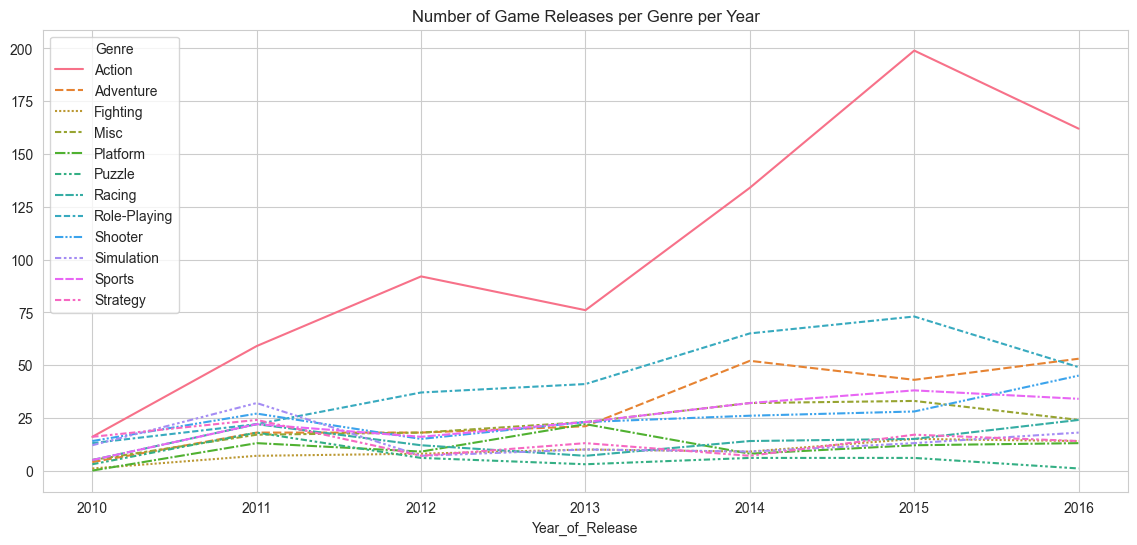

In [122]:
# Aggregating data to create a chart showing number of games of different genres released per year.
year_genre_count = gdc[['Year_of_Release', 'Genre']]
ygc = (year_genre_count.pivot_table(index = 'Year_of_Release', columns = 'Genre', aggfunc = 'size', fill_value = 0).sort_index().astype(int))
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
plt.title("Number of Game Releases per Genre per Year")
sns.lineplot(data = ygc)
#plt.savefig("genre_releases_per_year.png", dpi=300, bbox_inches="tight")
plt.show()


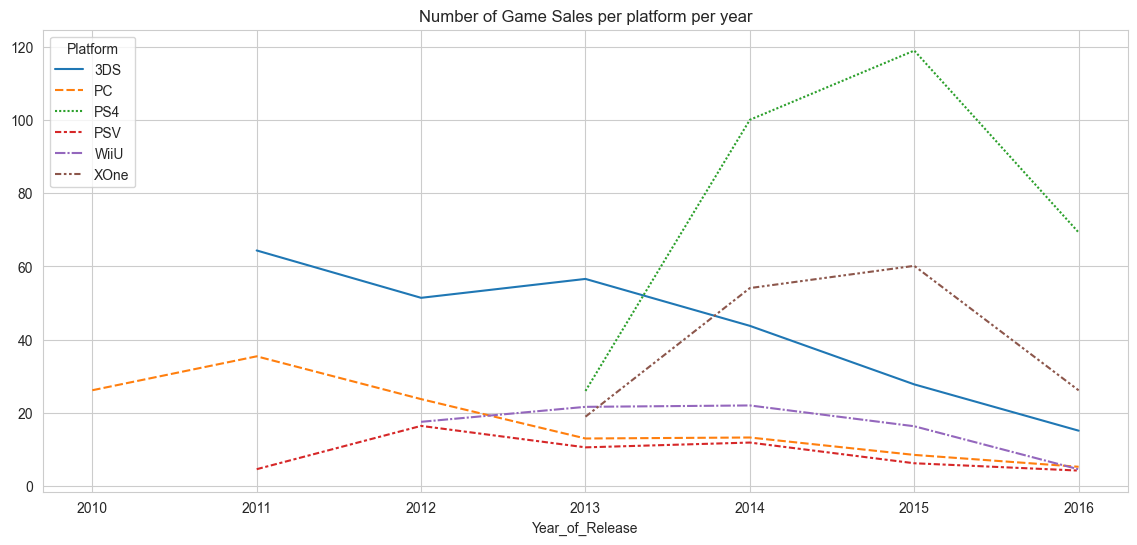

In [123]:
# Aggregating data to create a chart showing number of sales per platform per year.

sales_yearly = gdc[['Year_of_Release', 'Platform', 'Sales_Total']]
sy = sales_yearly.pivot_table(index = 'Year_of_Release', columns = 'Platform', values = 'Sales_Total', aggfunc = 'sum')
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
plt.title("Number of Game Sales per platform per year")
sns.lineplot(data = sy)
#plt.savefig("sales_per_platform_per_year.png", dpi=300, bbox_inches="tight")
plt.show()


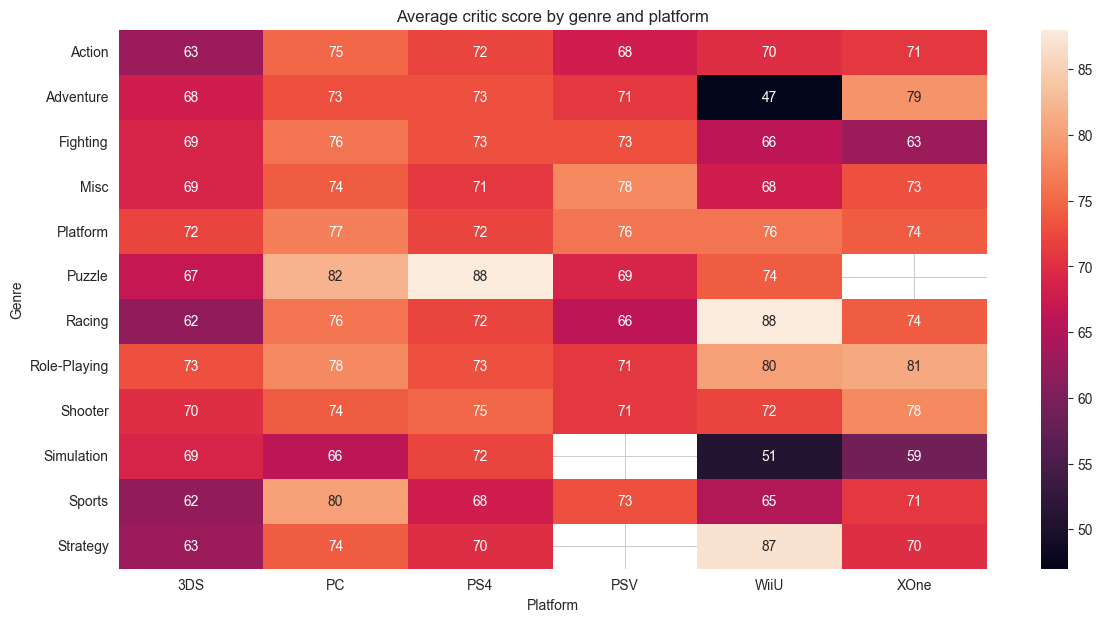

In [124]:
# Aggregating data to see the best combinations of Platform/Genre according to the critic scores.
avg_critic_score_by_platform = gdc[['Platform', 'Genre', 'Critic_Score']]
avg_critic_score_by_platform = avg_critic_score_by_platform.groupby(['Platform','Genre']).mean().reset_index().round()
avg_critic_score_by_platform = avg_critic_score_by_platform.pivot(index = 'Genre', columns = 'Platform', values = 'Critic_Score')

# Heatmap
plt.figure(figsize=(14,7))
plt.title("Average critic score by genre and platform")
sns.heatmap(data = avg_critic_score_by_platform, annot = True)
#plt.savefig("average_critic_score_by_genre_and_platform.png", dpi=300, bbox_inches="tight")
plt.show()


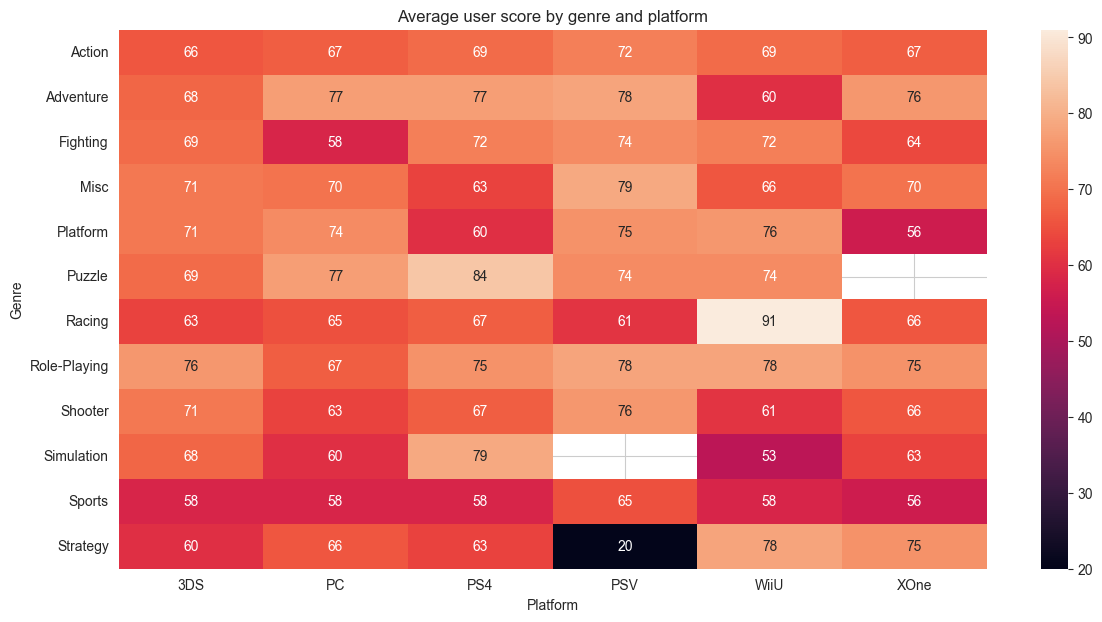

In [125]:
# Aggregating data to see the best combinations of Platform/Genre according to the user scores.
avg_user_score_by_platform = gdc[['Platform', 'Genre', 'User_Score']]
avg_user_score_by_platform = avg_user_score_by_platform.groupby(['Platform','Genre']).mean().reset_index().round()
avg_user_score_by_platform = avg_user_score_by_platform.pivot(index = 'Genre', columns = 'Platform', values = 'User_Score')

# Heatmap
plt.figure(figsize=(14,7))
plt.title("Average user score by genre and platform")
sns.heatmap(data = avg_user_score_by_platform, annot = True)
#plt.savefig("average_user_score_per_genre_and_platform.png", dpi=300, bbox_inches="tight")
plt.show()

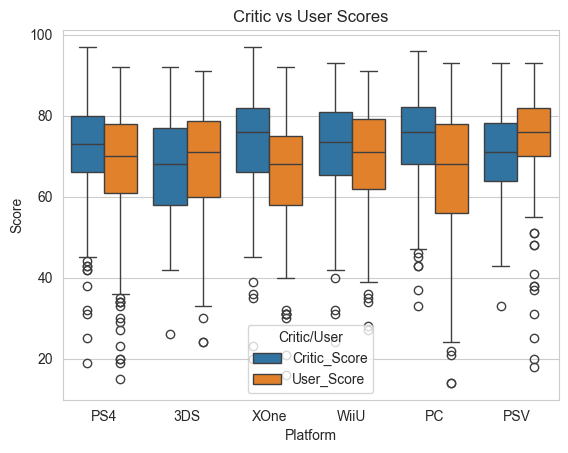

In [126]:
# Comparing the critic vs user scores based on platform

comp_scores = gdc[['Platform', 'Critic_Score', 'User_Score']]
comp_scores = pd.melt(comp_scores, id_vars=['Platform'], value_vars=['Critic_Score', 'User_Score'], var_name = 'Critic/User', value_name = 'Score')
comp_scores
sns.boxplot(x='Platform', y='Score', hue='Critic/User', data=comp_scores)
plt.title("Critic vs User Scores")
#plt.savefig("critic_vs_user_scores.png", dpi=300, bbox_inches="tight")
plt.show()


              Critic_Score  User_Score  Sales_Total
Critic_Score      1.000000    0.557654     0.405895
User_Score        0.557654    1.000000    -0.033625
Sales_Total       0.405895   -0.033625     1.000000


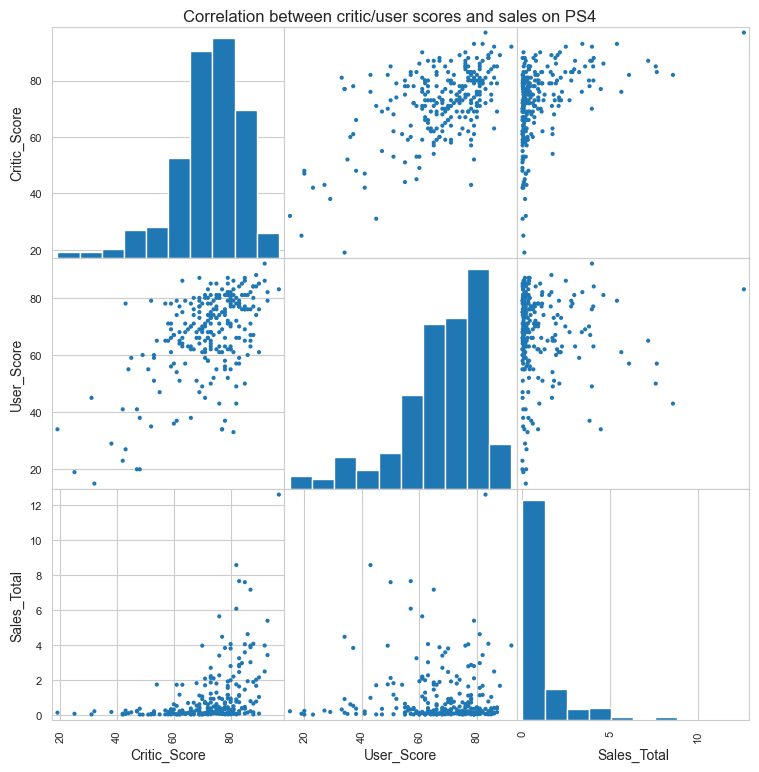

In [127]:
# Aggregating data to see correlation between critic/user scores and sales (PS4).

ps4 = gdc[gdc['Platform'] == 'PS4']
correl_ps4 = ps4[['Critic_Score', 'User_Score', 'Sales_Total']].dropna()
pd.plotting.scatter_matrix(correl_ps4, figsize=(9, 9), alpha=1)
print(correl_ps4.corr())
plt.suptitle("Correlation between critic/user scores and sales on PS4", y = 0.9)
#plt.savefig("correlation_ps4.png", dpi=300, bbox_inches="tight")
plt.show()


              Critic_Score  User_Score  Sales_Total
Critic_Score      1.000000    0.744168     0.339824
User_Score        0.744168    1.000000     0.233403
Sales_Total       0.339824    0.233403     1.000000


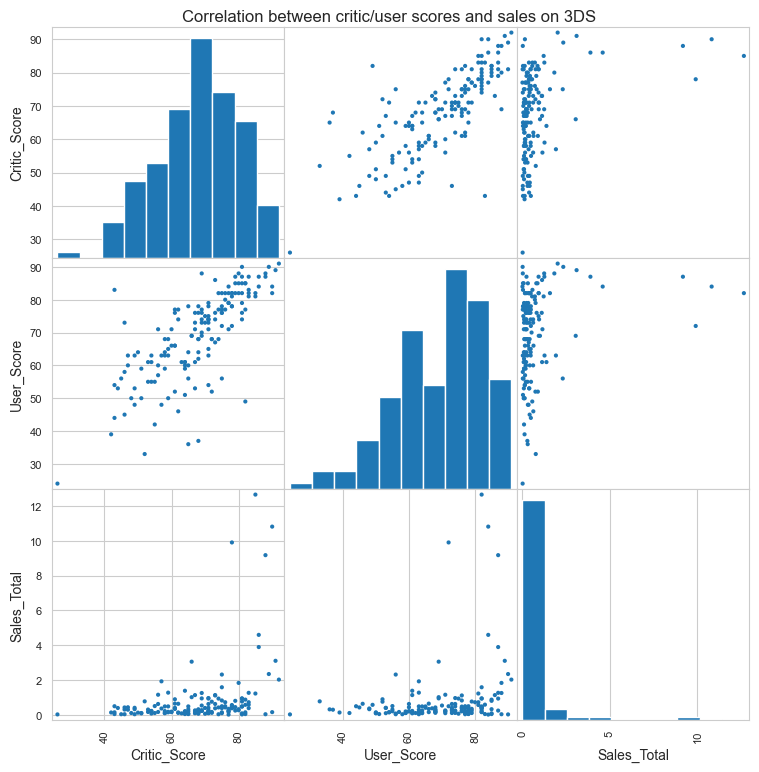

In [128]:
# Aggregating data to see correlation between critic/user scores and sales (3DS).

tds = gdc[gdc['Platform'] == '3DS']
correl_tds = tds[['Critic_Score', 'User_Score', 'Sales_Total']].dropna()
pd.plotting.scatter_matrix(correl_tds, figsize=(9, 9), alpha=1)
print(correl_tds.corr())
plt.suptitle("Correlation between critic/user scores and sales on 3DS", y = 0.9)
#plt.savefig("correlation_3ds.png", dpi=300, bbox_inches="tight")
plt.show()


              Critic_Score  User_Score  Sales_Total
Critic_Score      1.000000    0.472462     0.410422
User_Score        0.472462    1.000000    -0.094003
Sales_Total       0.410422   -0.094003     1.000000


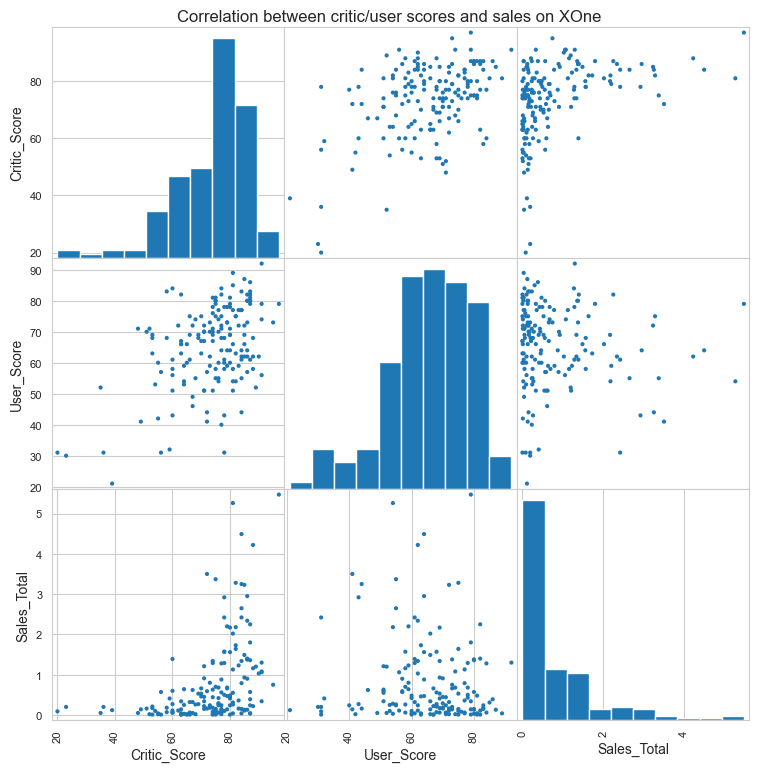

In [129]:
# Aggregating data to see correlation between critic/user scores and sales (XOne).

xone = gdc[gdc['Platform'] == 'XOne']
correl_xone = xone[['Critic_Score', 'User_Score', 'Sales_Total']].dropna()
pd.plotting.scatter_matrix(correl_xone, figsize=(9, 9), alpha=1)
print(correl_xone.corr())
plt.suptitle("Correlation between critic/user scores and sales on XOne", y = 0.9)
#plt.savefig("correlation_xone.png", dpi=300, bbox_inches="tight")
plt.show()


              Critic_Score  User_Score  Sales_Total
Critic_Score      1.000000    0.770080     0.350882
User_Score        0.770080    1.000000     0.391848
Sales_Total       0.350882    0.391848     1.000000


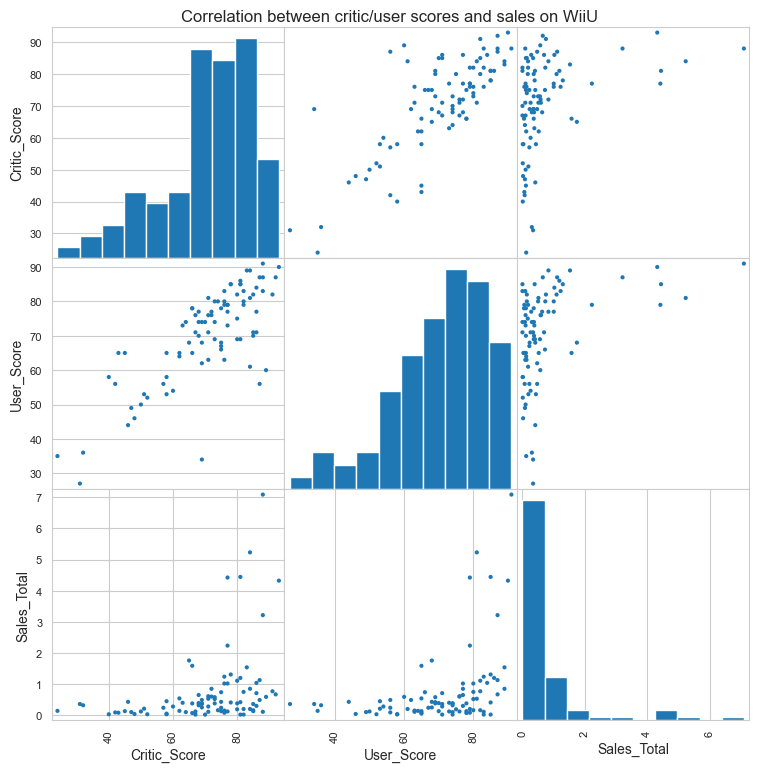

In [130]:
# Aggregating data to see correlation between critic/user scores and sales (WiiU).

wiiu = gdc[gdc['Platform'] == 'WiiU']
correl_wiiu = wiiu[['Critic_Score', 'User_Score', 'Sales_Total']].dropna()
pd.plotting.scatter_matrix(correl_wiiu, figsize=(9, 9), alpha=1)
print(correl_wiiu.corr())
plt.suptitle("Correlation between critic/user scores and sales on WiiU", y = 0.9)
#plt.savefig("correlation_wiiu.png", dpi=300, bbox_inches="tight")
plt.show()


              Critic_Score  User_Score  Sales_Total
Critic_Score      1.000000    0.483961     0.336262
User_Score        0.483961    1.000000    -0.017743
Sales_Total       0.336262   -0.017743     1.000000


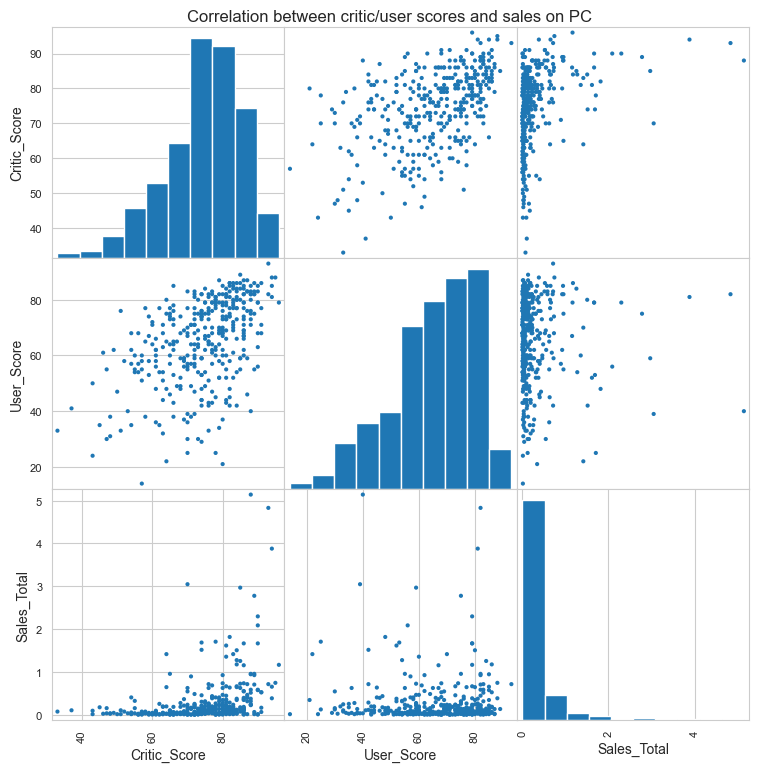

In [131]:
# Aggregating data to see correlation between critic/user scores and sales (PC).

pc = gdc[gdc['Platform'] == 'PC']
correl_pc = pc[['Critic_Score', 'User_Score', 'Sales_Total']].dropna()
pd.plotting.scatter_matrix(correl_pc, figsize=(9, 9), alpha=1)
print(correl_pc.corr())
plt.suptitle("Correlation between critic/user scores and sales on PC", y = 0.9)
#plt.savefig("correlation_pc.png", dpi=300, bbox_inches="tight")
plt.show()


              Critic_Score  User_Score  Sales_Total
Critic_Score      1.000000    0.733471     0.131349
User_Score        0.733471    1.000000     0.038374
Sales_Total       0.131349    0.038374     1.000000


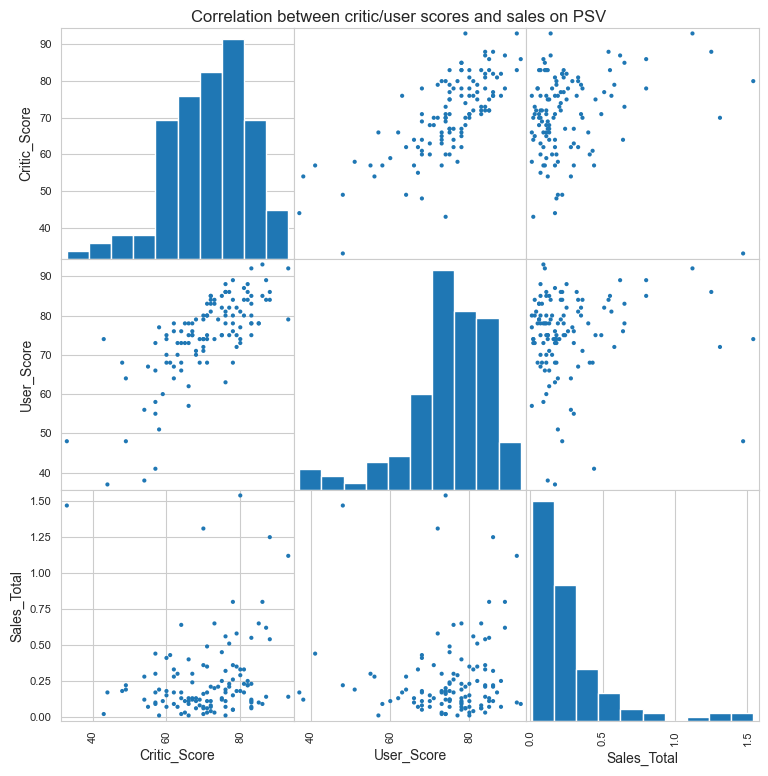

In [132]:
# Aggregating data to see correlation between critic/user scores and sales (PSV).

psv = gdc[gdc['Platform'] == 'PSV']
correl_psv = psv[['Critic_Score', 'User_Score', 'Sales_Total']].dropna()
pd.plotting.scatter_matrix(correl_psv, figsize=(9, 9), alpha=1)
print(correl_psv.corr())
plt.suptitle("Correlation between critic/user scores and sales on PSV", y = 0.9)
#plt.savefig("correlation_psv.png", dpi=300, bbox_inches="tight")
plt.show()


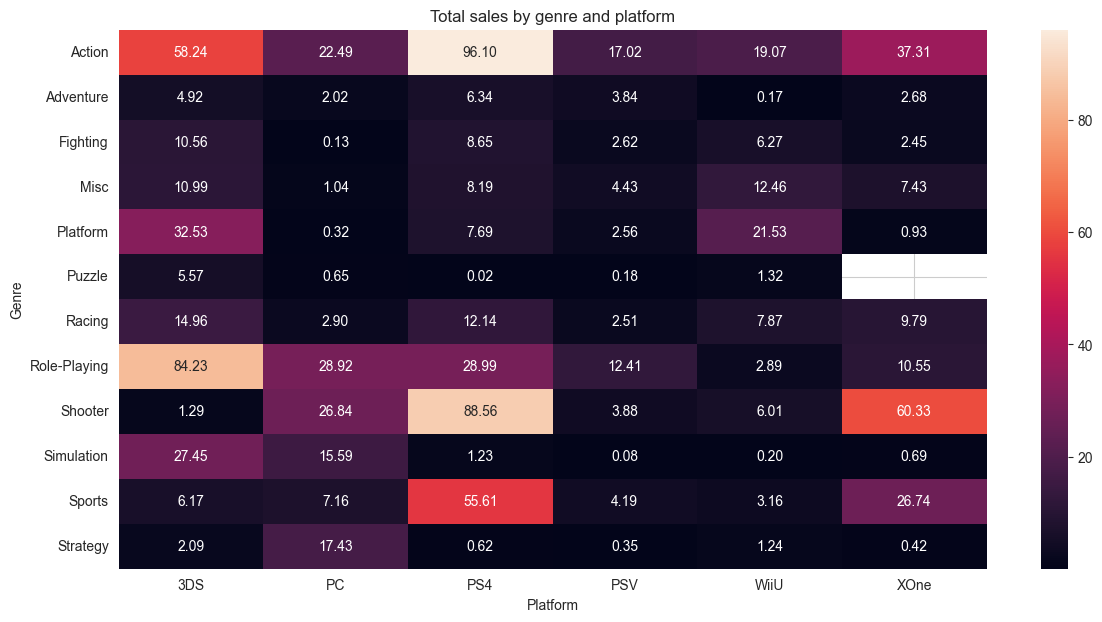

In [133]:
# Aggregating data to see the best combinations of Platform/Genre according to the total sales number.
sum_sale_numbers = gdc[['Platform', 'Genre', 'Sales_Total']]
sum_sale_numbers = sum_sale_numbers.groupby(['Platform','Genre']).sum().reset_index()
sum_sale_numbers = sum_sale_numbers.pivot(index = 'Genre', columns = 'Platform', values = 'Sales_Total')

# Heatmap
plt.figure(figsize=(14,7))
plt.title("Total sales by genre and platform")
sns.heatmap(data = sum_sale_numbers, annot = True, fmt='.2f')
#plt.savefig("total_sales_by_genre_and_platform.png", dpi=300, bbox_inches="tight")
plt.show()


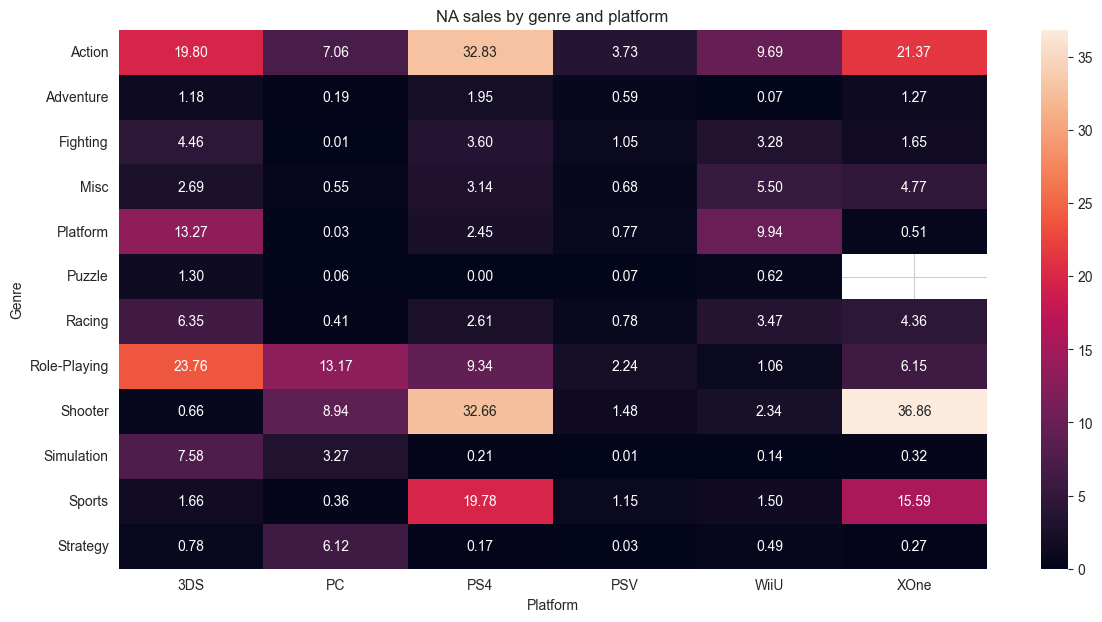

In [134]:
# Aggregating data to see the best combinations of Platform/Genre according to the sales in North America.
na_sale_numbers = gdc[['Platform', 'Genre', 'NA_sales']]
na_sale_numbers = na_sale_numbers.groupby(['Platform','Genre']).sum().reset_index()
na_sale_numbers = na_sale_numbers.pivot(index = 'Genre', columns = 'Platform', values = 'NA_sales')

# Heatmap
plt.figure(figsize=(14,7))
plt.title("NA sales by genre and platform")
sns.heatmap(data = na_sale_numbers, annot = True, fmt='.2f')
#plt.savefig("na_sales_by_genre_and_platform.png", dpi=300, bbox_inches="tight")
plt.show()


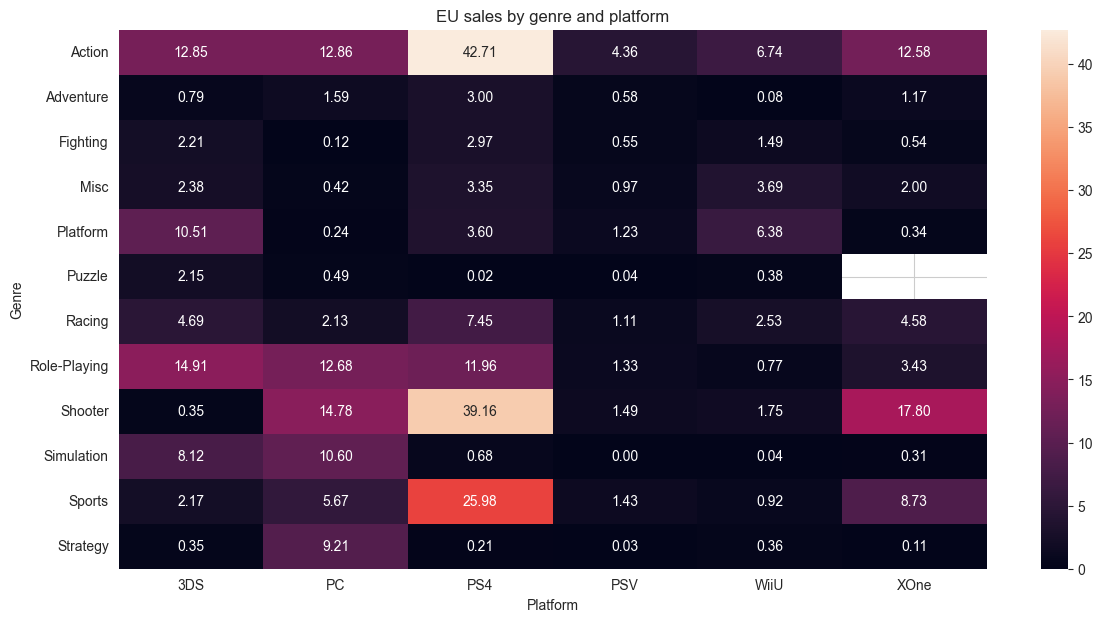

In [135]:
# Aggregating data to see the best combinations of Platform/Genre according to the sales in Europe.
eu_sale_numbers = gdc[['Platform', 'Genre', 'EU_sales']]
eu_sale_numbers = eu_sale_numbers.groupby(['Platform','Genre']).sum().reset_index()
eu_sale_numbers = eu_sale_numbers.pivot(index = 'Genre', columns = 'Platform', values = 'EU_sales')

# Heatmap
plt.figure(figsize=(14,7))
plt.title("EU sales by genre and platform")
sns.heatmap(data = eu_sale_numbers, annot = True, fmt='.2f')
#plt.savefig("eu_sales_by_genre_and_platform.png", dpi=300, bbox_inches="tight")
plt.show()


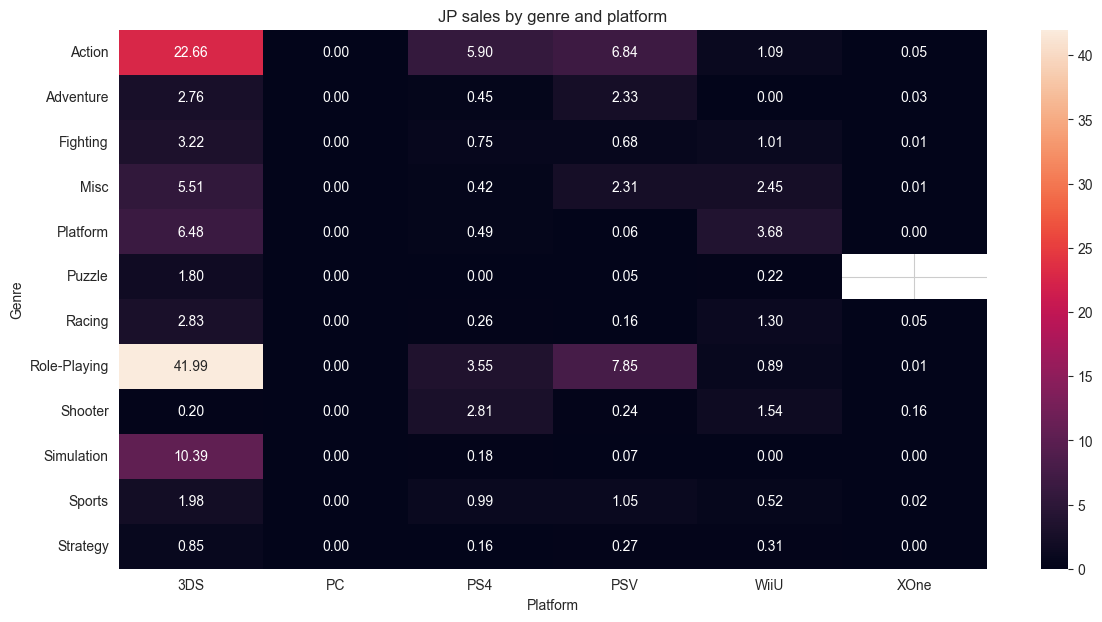

In [136]:
# Aggregating data to see the best combinations of Platform/Genre according to the sales in Japan.
jp_sale_numbers = gdc[['Platform', 'Genre', 'JP_sales']]
jp_sale_numbers = jp_sale_numbers.groupby(['Platform','Genre']).sum().reset_index()
jp_sale_numbers = jp_sale_numbers.pivot(index = 'Genre', columns = 'Platform', values = 'JP_sales')

# Heatmap
plt.figure(figsize=(14,7))
plt.title("JP sales by genre and platform")
sns.heatmap(data = jp_sale_numbers, annot = True, fmt='.2f')
#plt.savefig("jp_sales_by_genre_and_platform.png", dpi=300, bbox_inches="tight")
plt.show()


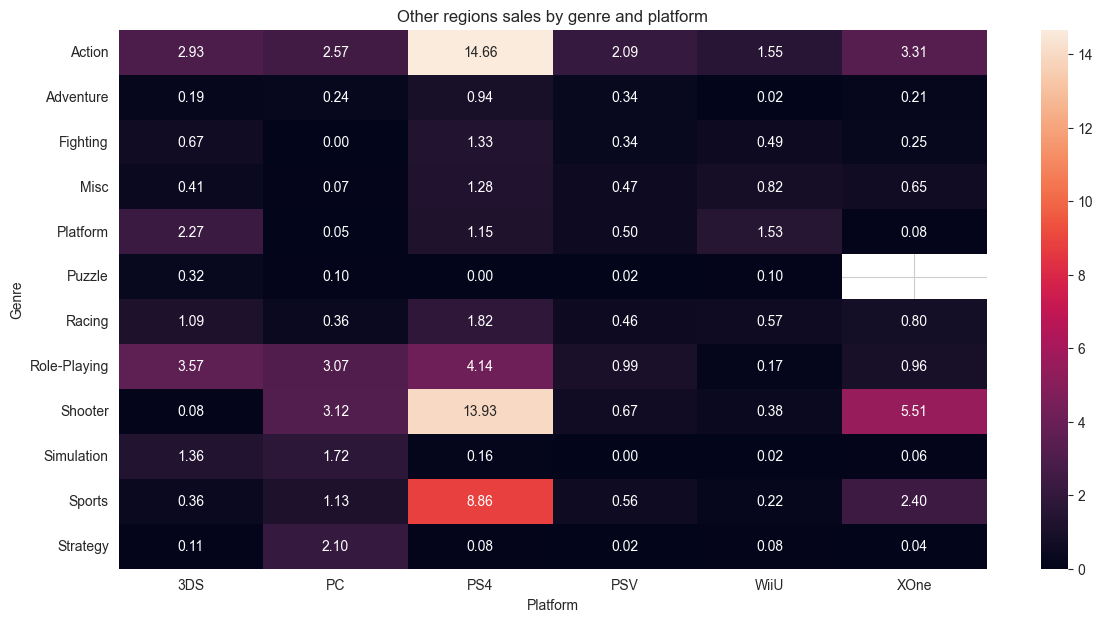

In [139]:
# Aggregating data to see the best combinations of Platform/Genre according to the sales in other regions.
oth_sale_numbers = gdc[['Platform', 'Genre', 'Other_sales']]
oth_sale_numbers = oth_sale_numbers.groupby(['Platform','Genre']).sum().reset_index()
oth_sale_numbers = oth_sale_numbers.pivot(index = 'Genre', columns = 'Platform', values = 'Other_sales')

# Heatmap
plt.figure(figsize=(14,7))
plt.title("Other regions sales by genre and platform")
sns.heatmap(data = oth_sale_numbers, annot = True, fmt='.2f')
#plt.savefig("oth_sales_by_genre_and_platform.png", dpi=300, bbox_inches="tight")
plt.show()


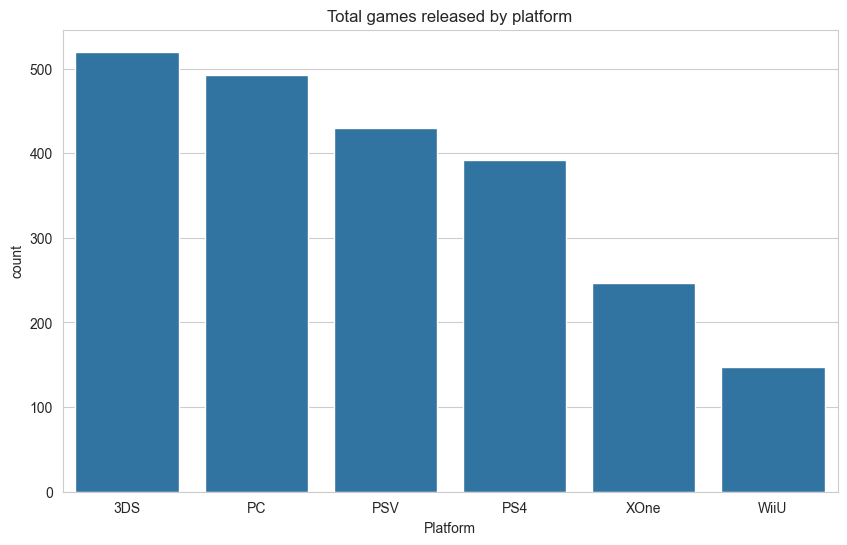

In [137]:
# Aggregating data to see the most popular platforms overall.
pop_platf = gdc[['Platform']].copy()
pop_platf = pop_platf.value_counts().reset_index()

#Setting up a bar chart
plt.figure(figsize=(10,6))
plt.title("Total games released by platform")
sns.barplot(x=pop_platf['Platform'], y=pop_platf['count'])
#plt.savefig("total_games_released_by_platform.png", dpi=300, bbox_inches="tight")
plt.show()
